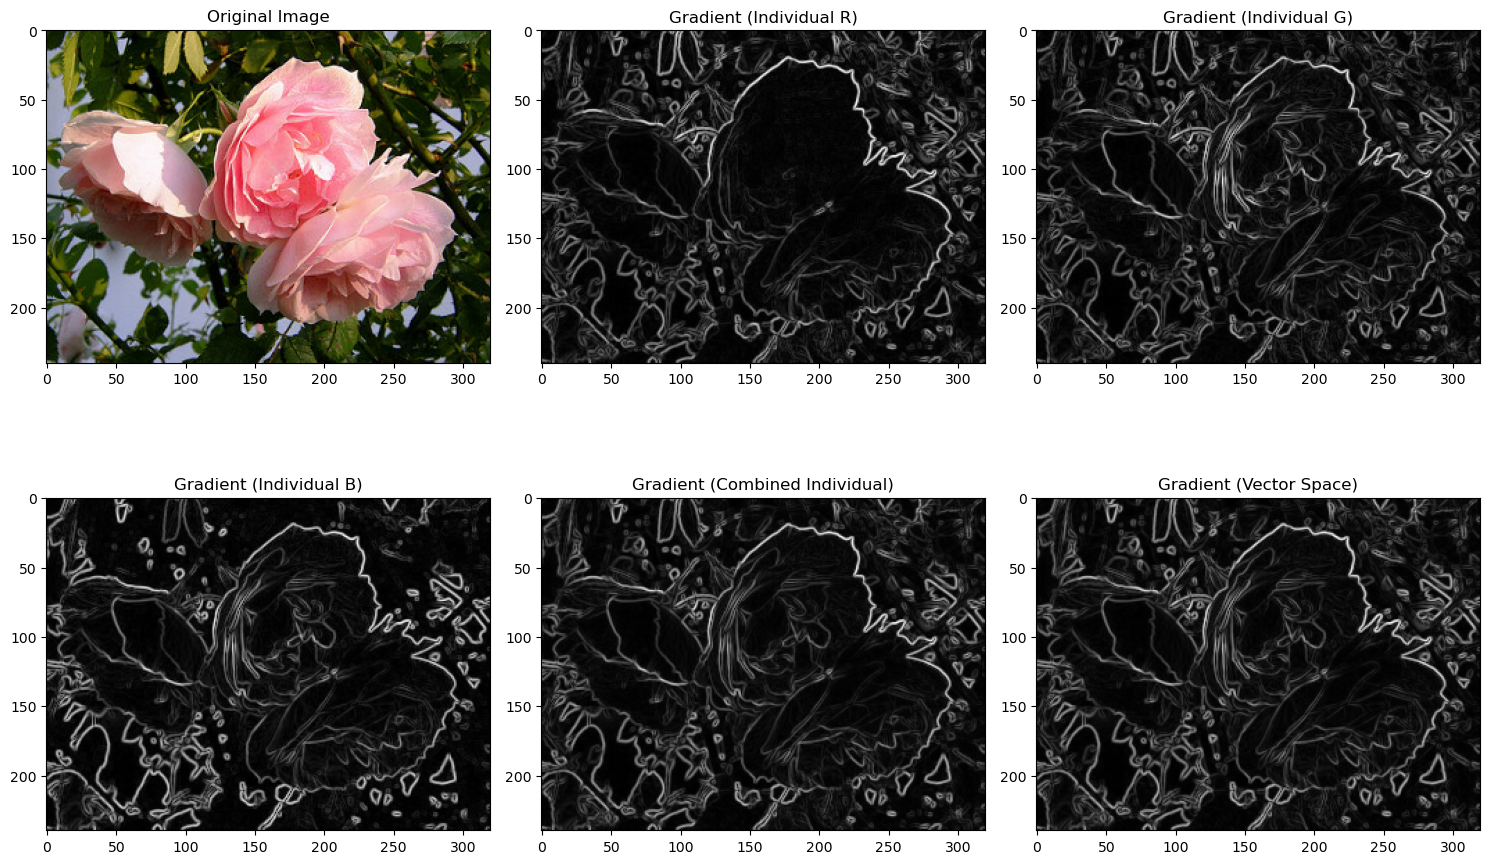

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image

image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to compute Sobel gradients
def compute_gradient(channel):
    grad_x = cv2.Sobel(channel, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(channel, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return gradient_magnitude

# 1. Gradient on individual components
R, G, B = cv2.split(image)
grad_R = compute_gradient(R)
grad_G = compute_gradient(G)
grad_B = compute_gradient(B)

# Combine the gradients
gradient_individual = (grad_R + grad_G + grad_B) / 3

# 2. Gradient in RGB vector space (Di Zenzo method)
def compute_vector_gradient(image):
    R, G, B = cv2.split(image)
    dRdx = cv2.Sobel(R, cv2.CV_64F, 1, 0, ksize=3)
    dRdy = cv2.Sobel(R, cv2.CV_64F, 0, 1, ksize=3)
    dGdx = cv2.Sobel(G, cv2.CV_64F, 1, 0, ksize=3)
    dGdy = cv2.Sobel(G, cv2.CV_64F, 0, 1, ksize=3)
    dBdx = cv2.Sobel(B, cv2.CV_64F, 1, 0, ksize=3)
    dBdy = cv2.Sobel(B, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gxx, gyy, and gxy
    gxx = dRdx**2 + dGdx**2 + dBdx**2
    gyy = dRdy**2 + dGdy**2 + dBdy**2
    gxy = dRdx * dRdy + dGdx * dGdy + dBdx * dBdy

    # Gradient magnitude (Di Zenzo)
    gradient_magnitude = np.sqrt(0.5 * (gxx + gyy + np.sqrt((gxx - gyy)**2 + 4 * gxy**2)))
    return gradient_magnitude

gradient_vector = compute_vector_gradient(image)

# Visualize results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(2, 3, 2)
plt.title("Gradient (Individual R)")
plt.imshow(grad_R, cmap="gray")

plt.subplot(2, 3, 3)
plt.title("Gradient (Individual G)")
plt.imshow(grad_G, cmap="gray")

plt.subplot(2, 3, 4)
plt.title("Gradient (Individual B)")
plt.imshow(grad_B, cmap="gray")

plt.subplot(2, 3, 5)
plt.title("Gradient (Combined Individual)")
plt.imshow(gradient_individual, cmap="gray")

plt.subplot(2, 3, 6)
plt.title("Gradient (Vector Space)")
plt.imshow(gradient_vector, cmap="gray")

plt.tight_layout()
plt.show()
